In this assignment the goal is to implement the dimensionality reduction technique *Principal Component Analysis (PCA)* to a very high dimensional data and apply visualization. Note that you are not allowed to use the built-in PCA API provided by the sklearn library. Instead you will be implementing from the scratch.

    For this task we use the MNIST dataset. First we download the dataset using openml api

In [1]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', cache=False)
X = mnist.data
y = mnist.target
print(X.shape, y.shape)

(70000, 784) (70000,)


# Part-1: Preprocessing
Before implementing PCA you are required to perform some preprocessing steps:
1. Mean normalization: Replace each feature/attribute, $x_{ji}$ with $x_j - \mu_j$, In other words, determine the mean of each feature set, and then for each feature subtract the mean from the value, so we re-scale the mean to be 0 
2. Feature scaling: If features have very different scales then scale make them comparable by altering the scale, so they all have a comparable range of values e.g. $x_{ji}$ is set to $(x_j - \mu_j) / s_j$  Where $s_j$ is some measure of the range, so could be  $\max(x_j) - \min(x_j)$ or Standard deviation $stddev(x_j)$.

In [2]:
#TODO Implement mean normalization and feature scaling


import numpy as np
#transpose X:
Xt = np.transpose(X)
# Average of the values in each row of X
ave_rows = np.mean(Xt, axis=0)

# Standard Deviation of the values in each row of X
std_rows = Xt.std(axis=0)    

#should be same number of rows as in X.shape:
# Print the shape of ave_rows
print(ave_rows.shape)
# Print the shape of std_rows
print(std_rows.shape)

#Mean normalization of X
X_norm = (Xt - ave_rows)

#Feature Scaling of X
X_scaled = X_norm/std_rows

print(X_norm)
print(X_scaled)

(70000,)
(70000,)
[[-35.10841837 -39.6619898  -24.7997449  ... -37.28443878 -33.87627551
  -53.35841837]
 [-35.10841837 -39.6619898  -24.7997449  ... -37.28443878 -33.87627551
  -53.35841837]
 [-35.10841837 -39.6619898  -24.7997449  ... -37.28443878 -33.87627551
  -53.35841837]
 ...
 [-35.10841837 -39.6619898  -24.7997449  ... -37.28443878 -33.87627551
  -53.35841837]
 [-35.10841837 -39.6619898  -24.7997449  ... -37.28443878 -33.87627551
  -53.35841837]
 [-35.10841837 -39.6619898  -24.7997449  ... -37.28443878 -33.87627551
  -53.35841837]]
[[-0.44079014 -0.47280168 -0.37816163 ... -0.44463709 -0.42776375
  -0.5574036 ]
 [-0.44079014 -0.47280168 -0.37816163 ... -0.44463709 -0.42776375
  -0.5574036 ]
 [-0.44079014 -0.47280168 -0.37816163 ... -0.44463709 -0.42776375
  -0.5574036 ]
 ...
 [-0.44079014 -0.47280168 -0.37816163 ... -0.44463709 -0.42776375
  -0.5574036 ]
 [-0.44079014 -0.47280168 -0.37816163 ... -0.44463709 -0.42776375
  -0.5574036 ]
 [-0.44079014 -0.47280168 -0.37816163 ... -0

# Part-2: Covariance matrix
Now the preprocessing is finished. Next, as explained in the lecture, you need to compute the covariance matrix https://en.wikipedia.org/wiki/Covariance_matrix. Given $n \times m$ $n$ rows and $m$ columns matrix, a covariance matrix is an $n \times n$ matrix given as below (sigma)
$\Sigma = \frac{1}{m}\sum{\left(x^{i}\right)\times \left(x^{i}\right)^{T}}$
You may use the "numpy.cov" function in numpy library 

In [3]:
#TODO Compute X to covariance matrix cov_matrix.
cov_matrix = np.cov(X_scaled)
print(cov_matrix)

[[0.00590748 0.00590748 0.00590748 ... 0.00590748 0.00590748 0.00590748]
 [0.00590748 0.00590748 0.00590748 ... 0.00590748 0.00590748 0.00590748]
 [0.00590748 0.00590748 0.00590748 ... 0.00590748 0.00590748 0.00590748]
 ...
 [0.00590748 0.00590748 0.00590748 ... 0.00590748 0.00590748 0.00590748]
 [0.00590748 0.00590748 0.00590748 ... 0.00590748 0.00590748 0.00590748]
 [0.00590748 0.00590748 0.00590748 ... 0.00590748 0.00590748 0.00590748]]


# Part-3: SVD computation
Now compute the SVD on the covariance matrix $SVD(\Sigma)$. You may use the svd implementation in numpy.linalg.svd

In [4]:
import numpy as np
def getSVD(temp):
    U, S, V = np.linalg.svd(temp,  full_matrices=False)
    return (U,S,V)
U,S,V = getSVD(cov_matrix) #SVD

# Part-4: Compute PCA matrix (K dimensional)
Now select the first $k$ columns from the matrix $U$ and multiply with the 

In [13]:
def getKComponents(U, X, K):
    #TODO implement matrix multiplication of first k columns of U * X
    Uk = np.transpose(U[:,:K])
    out = np.matmul(Uk,X)
    return (out)
#I set variable K to 10 for testing:
PCA = getKComponents(U,X_scaled,10)

# Part-5: Compute Reconstruction Error
Implement a function to compute the variance ratio (from reconstruction error)

In [17]:
def getVarianceRatio(PCA, K, X):
    #Implement computation of reconstruction error
    # Average of the values in each row of U
    mean_rows = np.mean(PCA, axis=0)

    # Standard Deviation of the values in each row of U
    std_PCA_rows = PCA.std(axis=0)   
    
    #XApproximated:
    Xapprox = (PCA-mean_rows)/std_PCA_rows
    
    Xpow = X[:K,:]
    for i in range(Xpow.shape[1]):
        Xpow[:,i] = Xpow[:,i]**i

    for i in range(Xapprox.shape[1]):
        Xapprox[:,i] = Xpow[:,i]**i
    
    m=X.shape[0]*X.shape[1]
    
    sub=Xapprox-Xpow
    print(sub)
    print(1/m*sum(sum(abs(sub)**2)))
    print(1/m*sum(sum(abs(Xpow)**2)))
    
    #Reconstruction Error:
    recErr = (1/m*sum(sum((abs(sub)**2))))/(1/m*sum(sum(abs(Xpow)**2)))
    return (recErr)

recErr = getVarianceRatio(PCA,10,X_scaled)
print(recErr)

    #Xapprox = Uk.Z
    #ratio = (1/m sgm[i=1,m]||x^i-xapprox^i||^2)/(1/m sgm[i=1,m]||x^i||^2)

[[ 0.00000000e+00  0.00000000e+00 -9.36176040e-28 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00 -9.36176040e-28 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00 -9.36176040e-28 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 ...
 [ 0.00000000e+00  0.00000000e+00 -3.05969940e-14 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00 -3.05969940e-14 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00 -1.74919934e-07 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]]
5.575252052868255e-22
2.229485115372503e-07
2.5006904125200855e-15


# Part-6: Scatter plot 2-dimensional PCA
Using matplotlib plot the 2-dimensional scatter plot of the first 2 compoenents with y (target) as labels

[Text(0, 0, ''), Text(0, 0, '5'), Text(0, 0, '0')]

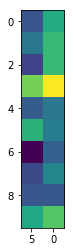

In [8]:
#TODO Plot the scatter plot 
#plot PCA[:,:2] using y[0] and y[1] as labels

import matplotlib.pyplot as plt

fig, ax1 = plt.subplots(1,1)
ax1.imshow(PCA[:,:2])
ax1.set_xticklabels(['',y[0],y[1]])

Find the minimum value of $K$ with which the ratio between averaged squared projection error with total variation in data is less than 10% in other words we retain 90% of the variance. You can achieve this by repeating getKComponents with $K=1$ until the variance ratio is <= 10%.

# Part-7: TSNE visualization
Finally, having found an optimal $K$ use these components as an input data to another dimensionality reduction method called tSNE (https://en.wikipedia.org/wiki/T-distributed_stochastic_neighbor_embedding) and reduce it to 2 dimensions.

In [23]:
from sklearn.manifold import TSNE
rndperm = np.random.permutation(mnist.data.shape[0])
n_sne = 10000 #it is sufficient if done for 10k samples
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)

pca_result_50 = np.transpose(getKComponents(U,X_scaled,50))

tsne_pca_results = tsne.fit_transform(pca_result_50[rndperm[:n_sne]])

(70000, 50)
[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 10000 samples in 0.062s...
[t-SNE] Computed neighbors for 10000 samples in 24.497s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 5.415166
[t-SNE] KL divergence after 250 iterations with early exaggeration: 81.412766
[t-SNE] KL divergence after 300 iterations: 2.731964


Finally, scatter plot the components given by the tSNE using matplotlib compare it to the earlier scatter plot.

[Text(0, 0, ''), Text(0, 0, '5'), Text(0, 0, '0')]

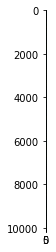

In [25]:
#TODO: Scatter plot the 2-dimensional tsne compoents with target as labels
import matplotlib.pyplot as plt

fig, ax1 = plt.subplots(1,1)
ax1.imshow(tsne_pca_results[:,:2])
ax1.set_xticklabels(['',y[0],y[1]])